<a href="https://colab.research.google.com/github/NayanKanaparthi/Stock-prediction-RNN/blob/main/stock_prediction_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [17]:
dataset = pd.read_csv("/content/drive/MyDrive/Machine learning/ibm stock/AABA_2006-01-01_to_2018-01-01.csv",index_col='Date',parse_dates=['Date'])
print(dataset.head())
len(dataset)

             Open   High    Low  Close    Volume  Name
Date                                                  
2006-01-03  39.69  41.22  38.79  40.91  24232729  AABA
2006-01-04  41.22  41.90  40.77  40.97  20553479  AABA
2006-01-05  40.93  41.73  40.85  41.53  12829610  AABA
2006-01-06  42.88  43.57  42.80  43.21  29422828  AABA
2006-01-09  43.10  43.66  42.82  43.42  16268338  AABA


3019

In [18]:
#plot function

def plot_function(test,predicted):
  plt.plot(test,color='red',label='real IBM stock price')
  plt.plot(predicted,color='blue',label='predicted prices')
  plt.title("IBM stock prediction")
  plt.xlabel('time')
  plt.ylabel('ibm stock price')
  plt.legend()
  plt.show()

#root mean squared error
def return_rmse(test,predicted):
  rmse = math.sqrt(mean_squared_error(test,predicted))
  print("rmse is {}".format(rmse))


In [19]:
#splitting the data
training = dataset[:'2016'].iloc[:,1:2].values #splitting the dataset till the year 2016
test=dataset['2017':].iloc[:,1:2].values


len(training)


2768

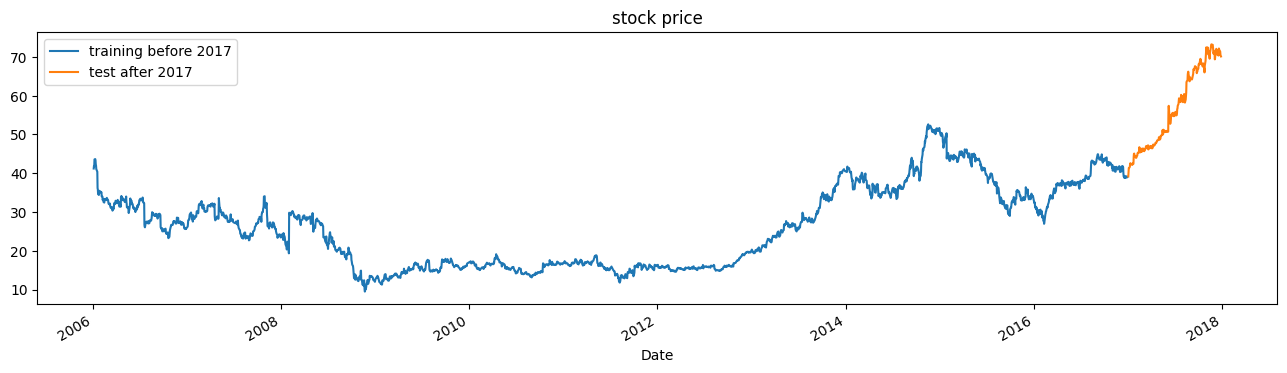

In [20]:
dataset['High'][:'2016'].plot(figsize=(16,4),legend=True)
dataset['High']['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['training before 2017','test after 2017'])
plt.title("stock price")
plt.show()

In [21]:
#scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training)

In [22]:
#done with the scaling, we have to create the data set with 60 timesteps and 1 output
#so, for each training element we have 60 sub elements helping in predicting the 61st element
x_train = []
y_train = []

for i in range(60,2768):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)


print(x_train.shape)
print(y_train.shape)
print(test.shape)


(2708, 60)
(2708,)
(251, 1)


In [23]:
# lstm model takes 3 parameters input,forget and output....so we have to reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [27]:
#builing a model

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2)) #to prevent overfitting
model.add(LSTM(50,return_sequences=True)) #2
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True)) #3
model.add(Dropout(0.2))
model.add(LSTM(50)) #4
model.add(Dropout(0.2))

#first 3 lstm layers will returns sequences.because only sequences can be input into the layer
#last layer will not return a sequence instead it will return the output itself


#output layer
model.add(Dense(units=1))

#compiling the RNN
model.compile(optimizer='rmsprop',loss='mean_squared_error')

#fitting the data
model.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 14s 18ms/step - loss: 0.0147
Epoch 2/50
85/85 [==============================] - 2s 18ms/step - loss: 0.0066
Epoch 3/50
85/85 [==============================] - 1s 13ms/step - loss: 0.0061
Epoch 4/50
85/85 [==============================] - 1s 12ms/step - loss: 0.0047
Epoch 5/50
85/85 [==============================] - 1s 13ms/step - loss: 0.0045
Epoch 6/50
85/85 [==============================] - 1s 13ms/step - loss: 0.0040
Epoch 7/50
85/85 [==============================] - 1s 13ms/step - loss: 0.0034
Epoch 8/50
85/85 [==============================] - 1s 13ms/step - loss: 0.0032
Epoch 9/50
85/85 [==============================] - 1s 13ms/step - loss: 0.0031
Epoch 10/50
85/85 [==============================] - 1s 13ms/step - loss: 0.0030
Epoch 11/50
85/85 [==============================] - 1s 13ms/step - loss: 0.0029
Epoch 12/50
85/85 [==============================] - 1s 17ms/step - loss: 0.0028
Epoch 13/50
85/85 [=================

In [30]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [32]:
len(test)
311-60

251

In [33]:
# Preparing X_test and predicting the prices
x_test = []
for i in range(60,311):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 3s 9ms/step


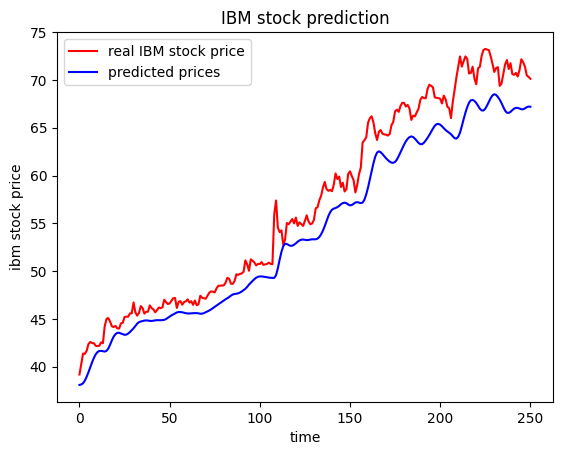

In [35]:
plot_function(test,predicted_stock_price)

In [36]:
# Evaluating our model
return_rmse(test,predicted_stock_price)

rmse is 3.1376379929260048
